In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import requests
import gmaps
import os
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key

In [2]:
#Load CSV File
#Data source: Data_Tables_LGA_Recorded_Offences_Year_Ending_December_2021 - Table 3 Offences recorded by offence type, local government area and postcode or suburb/town - January 2012 to December 2021
#From https://www.crimestatistics.vic.gov.au/crime-statistics/latest-victorian-crime-data/download-data
Offence_data = pd.read_csv("Resources/Offences_Types_LGA.csv")
Offence_data.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2021,December,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1
1,2021,December,Alpine,3691,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1
2,2021,December,Alpine,3691,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1
3,2021,December,Alpine,3691,Kergunyah South,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1
4,2021,December,Alpine,3691,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,2


In [3]:
Offence_data["Offence Division"].value_counts()

B Property and deception offences       139245
A Crimes against the person              96647
D Public order and security offences     45040
E Justice procedures offences            37208
C Drug offences                          25162
F Other offences                          8621
Name: Offence Division, dtype: int64

In [4]:
#Filter to only Drug Offence Data
Drugs_Offence = Offence_data.loc[(Offence_data["Offence Division"] == "C Drug offences")]
Drugs_Offence.reset_index(inplace=True)
Drugs_Offence = Drugs_Offence.drop(columns=["Offence Subgroup", "index"])
Drugs_Offence

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count
0,2021,December,Alpine,3698,Tawonga South,C Drug offences,C30 Drug use and possession,1
1,2021,December,Alpine,3737,Gapsted,C Drug offences,C10 Drug dealing and trafficking,1
2,2021,December,Alpine,3737,Gapsted,C Drug offences,C30 Drug use and possession,2
3,2021,December,Alpine,3737,Merriang,C Drug offences,C30 Drug use and possession,1
4,2021,December,Alpine,3737,Mudgegonga,C Drug offences,C30 Drug use and possession,3
...,...,...,...,...,...,...,...,...
25157,2012,December,Yarriambiack,3393,Warracknabeal,C Drug offences,C30 Drug use and possession,10
25158,2012,December,Yarriambiack,3395,Beulah,C Drug offences,C10 Drug dealing and trafficking,2
25159,2012,December,Yarriambiack,3395,Beulah,C Drug offences,C30 Drug use and possession,2
25160,2012,December,Yarriambiack,3396,Hopetoun,C Drug offences,C10 Drug dealing and trafficking,1


# Has drug related offence been increasing over the years?

In [5]:
#Calculate total drug offence 
Drugs_Offence["Offence Count"] = pd.to_numeric(Drugs_Offence["Offence Count"],errors = "coerce")
Total_Offence = Drugs_Offence["Offence Count"].sum()
Total_Offence

289785.0

In [6]:
#Calculate total drug offence across each year
Drugs_Offence_Year = Drugs_Offence.groupby(["Year"])["Offence Count"].sum()
Drugs_Offence_Year_data = pd.DataFrame(Drugs_Offence_Year)
Drugs_Offence_Year_data.reset_index(inplace=True)
Drugs_Offence_Year_data

,Year,Offence Count
0,2012,20225.0
1,2013,23358.0
2,2014,25812.0
3,2015,30241.0
4,2016,31062.0
5,2017,28071.0
6,2018,30462.0
7,2019,32268.0
8,2020,39031.0
9,2021,29255.0


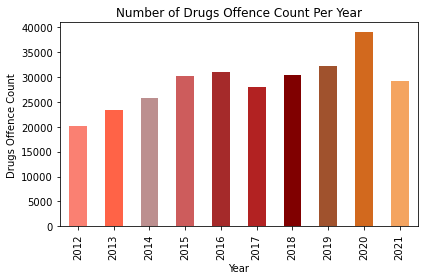

In [7]:
#Plot the graph
coloursA = ["salmon", "tomato","rosybrown","indianred", "brown", "firebrick", "maroon", "sienna", "chocolate", "sandybrown"]
Drugs_Offence_Chart = Drugs_Offence_Year_data.plot(x = "Year", y = "Offence Count", kind="bar", color = coloursA)
plt.title("Number of Drugs Offence Count Per Year")
plt.xlabel("Year")
plt.ylabel("Drugs Offence Count")
Drugs_Offence_Chart.get_legend().remove()
plt.tight_layout()
plt.savefig("output_data/Number_of_Drugs_Offence_Count_Per_Year.png")

# What types of drug crime is the most popular?

In [8]:
Drugs_Offence["Offence Subdivision"].value_counts()

C30 Drug use and possession           12566
C20 Cultivate or manufacture drugs     6288
C10 Drug dealing and trafficking       5769
C90 Other drug offences                 539
Name: Offence Subdivision, dtype: int64

In [9]:
Drugs_Offence_Type = Drugs_Offence.groupby(["Offence Subdivision"])["Offence Count"].sum()
Drugs_Offence_Type_data = pd.DataFrame(Drugs_Offence_Type)
Drugs_Offence_Type_data

,Offence Count
Offence Subdivision,
C10 Drug dealing and trafficking,45803.0
C20 Cultivate or manufacture drugs,16430.0
C30 Drug use and possession,226366.0
C90 Other drug offences,1186.0


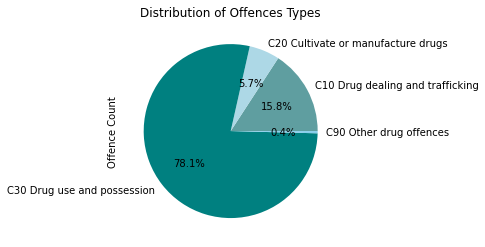

In [10]:
coloursB = ["cadetblue", "lightblue", "teal","skyblue"]
Drugs_Offence_Type_PieChart = Drugs_Offence_Type_data.plot(x = "Offence Subdivision", y="Offence Count", kind="pie",  title="Distribution of Offences Types", colors=coloursB, autopct="%1.1f%%")
Drugs_Offence_Type_PieChart.get_legend().remove()
plt.savefig("output_data/Distribution_of_Offences_Types.png")

In [11]:
Drugs_Offence_Year = Drugs_Offence.groupby(["Year","Offence Subdivision"])["Offence Count"].sum()
Drugs_Offence_Year_Data = pd.DataFrame(Drugs_Offence_Year)
Drugs_Offence_Year_Data

Offence Count
Year Offence Subdivision                              
2012 C10 Drug dealing and trafficking           3523.0
     C20 Cultivate or manufacture drugs         1503.0
     C30 Drug use and possession               15137.0
     C90 Other drug offences                      62.0
2013 C10 Drug dealing and trafficking           4199.0
     C20 Cultivate or manufacture drugs         1790.0
     C30 Drug use and possession               17291.0
     C90 Other drug offences                      78.0
2014 C10 Drug dealing and trafficking           4481.0
     C20 Cultivate or manufacture drugs         1654.0
     C30 Drug use and possession               19626.0
     C90 Other drug offences                      51.0
2015 C10 Drug dealing and trafficking           5317.0
     C20 Cultivate or manufacture drugs         1765.0
     C30 Drug use and possession               22877.0
     C90 Other drug offences                     282.0
2016 C10 Drug dealing and trafficking           4989.0
     C20 Cultivate or manufacture drugs         1573.0
     C30 Drug use and possession               24432.0
     C90 Other drug offences                      68.0
2017 C10 Drug dealing and trafficking           4172.0
     C20 Cultivate or manufacture drugs         1308.0
     C30 Drug use and possession               22478.0
     C90 Other drug offences                     113.0
2018 C10 Drug dealing and trafficking           4732.0
     C20 Cultivate or manufacture drugs         1374.0
     C30 Drug use and possession               24206.0
     C90 Other drug offences                     150.0
2019 C10 Drug dealing and trafficking           4920.0
     C20 Cultivate or manufacture drugs         1537.0
     C30 Drug use and possession               25692.0
     C90 Other drug offences                     119.0
2020 C10 Drug dealing and trafficking           5544.0
     C20 Cultivate or manufacture drugs         1967.0
     C30 Drug use and possession               31385.0
     C90 Other drug offences                     135.0
2021 C10 Drug dealing and trafficking           3926.0
     C20 Cultivate or manufacture drugs         1959.0
     C30 Drug use and possession               23242.0
     C90 Other drug offences                     128.0

In [12]:
Drugs_Offence_Year_Data.reset_index(inplace=True)
Drugs_Offence_Year_Data

,Year,Offence Subdivision,Offence Count
0,2012,C10 Drug dealing and trafficking,3523.0
1,2012,C20 Cultivate or manufacture drugs,1503.0
2,2012,C30 Drug use and possession,15137.0
3,2012,C90 Other drug offences,62.0
4,2013,C10 Drug dealing and trafficking,4199.0
5,2013,C20 Cultivate or manufacture drugs,1790.0
6,2013,C30 Drug use and possession,17291.0
7,2013,C90 Other drug offences,78.0
8,2014,C10 Drug dealing and trafficking,4481.0
9,2014,C20 Cultivate or manufacture drugs,1654.0


In [13]:
#Filter by each offence subdivision
DealingOffence = Drugs_Offence_Year_Data.loc[(Drugs_Offence_Year_Data["Offence Subdivision"] == "C10 Drug dealing and trafficking")]
MakingDrugOffence = Drugs_Offence_Year_Data.loc[(Drugs_Offence_Year_Data["Offence Subdivision"] == "C20 Cultivate or manufacture drugs")]
UseOffence = Drugs_Offence_Year_Data.loc[(Drugs_Offence_Year_Data["Offence Subdivision"] == "C30 Drug use and possession")]
OtherOffence = Drugs_Offence_Year_Data.loc[(Drugs_Offence_Year_Data["Offence Subdivision"] == "C90 Other drug offences")]

In [14]:
#Merging the following dataframes: DealingOffence MakingDrugOffence UseOffence OtherOffence)
OffenceCountBySubdivision_A = pd.merge(DealingOffence, MakingDrugOffence, on = "Year", how = "outer") 
OffenceCountBySubdivision_B = pd.merge(OffenceCountBySubdivision_A, UseOffence, on = "Year", how = "outer")
OffenceCountBySubdivision_B = OffenceCountBySubdivision_B.drop(columns=["Offence Subdivision_x", "Offence Subdivision_y", "Offence Subdivision"])
OffenceCountBySubdivision_B = OffenceCountBySubdivision_B.rename(columns={"Offence Count_x": "Drug dealing and trafficking", "Offence Count_y": "Cultivate or manufacture drugs", "Offence Count": "Drug use and possession"})
OffenceCountBySubdivision = pd.merge(OffenceCountBySubdivision_B, OtherOffence, on = "Year", how = "outer")
OffenceCountBySubdivision = OffenceCountBySubdivision.drop(columns=["Offence Subdivision"])
OffenceCountBySubdivision = OffenceCountBySubdivision.rename(columns={"Offence Count": "Other drug offences"})
OffenceCountBySubdivision

,Year,Drug dealing and trafficking,Cultivate or manufacture drugs,Drug use and possession,Other drug offences
0,2012,3523.0,1503.0,15137.0,62.0
1,2013,4199.0,1790.0,17291.0,78.0
2,2014,4481.0,1654.0,19626.0,51.0
3,2015,5317.0,1765.0,22877.0,282.0
4,2016,4989.0,1573.0,24432.0,68.0
5,2017,4172.0,1308.0,22478.0,113.0
6,2018,4732.0,1374.0,24206.0,150.0
7,2019,4920.0,1537.0,25692.0,119.0
8,2020,5544.0,1967.0,31385.0,135.0
9,2021,3926.0,1959.0,23242.0,128.0


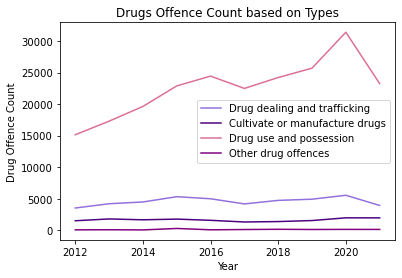

In [15]:
#Plot bar charts
colours = ["mediumpurple", "indigo", "palevioletred", "purple"]
OffenceCountBySubdivision.plot(x="Year", y=["Drug dealing and trafficking", "Cultivate or manufacture drugs", "Drug use and possession", "Other drug offences"], kind="line", color = colours)
plt.title("Drugs Offence Count based on Types")
plt.ylabel("Drug Offence Count")
plt.savefig("output_data/Drugs_Offence_Count_based_on_Types.png")

# What suburbs have the most drug related offence?

In [16]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

In [17]:
Drug_Per_Suburbs = Drugs_Offence.groupby(["Suburb/Town Name"])["Offence Count"].sum()
Drug_Per_Suburbs_data = pd.DataFrame(Drug_Per_Suburbs)
Drug_Per_Suburbs_data = Drug_Per_Suburbs_data.reset_index()
Drug_Per_Suburbs_data["Suburb/Town Name"] = Drug_Per_Suburbs_data["Suburb/Town Name"].astype(str) 
Drug_Per_Suburbs_data = Drug_Per_Suburbs_data.rename(columns={"Suburb/Town Name": "Suburbs"})
Drug_Per_Suburbs_data

,Suburbs,Offence Count
0,Abbotsford,1034.0
1,Aberfeldie,70.0
2,Acheron,4.0
3,Adams Estate,1.0
4,Adelaide Lead,2.0
...,...,...
1939,Yinnar South,11.0
1940,Youarang,6.0
1941,Yuroke,4.0
1942,Yuulong,2.0


In [18]:
Suburbs = Drug_Per_Suburbs_data["Suburbs"]

## Use weather API to get latitude and longtitude data for each suburbs to plot heatmap

In [19]:
#This part will take approx 20 mins to run - the csv file is saved - please go to input line 22 to save time
Latitude = []
Longtitude = []
CityName = []
Country = []
country = ",AU"

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "&appid=" + weather_api_key + "&q=" 

for suburb in Suburbs:
    try:
        response = requests.get(query_url + suburb + country).json()
        Latitude.append(response["coord"]["lat"])
        Longtitude.append(response["coord"]["lon"])
        Country.append(response["sys"]["country"])
        CityName.append(suburb)
        
        print(f"Processing Record of {suburb}")

    except:
        Latitude.append("N/A")
        Longtitude.append("N/A")
        Country.append("N/A")
        CityName.append(suburb)
        print("Skipping...")

Processing Record of Abbotsford
Processing Record of Aberfeldie
Processing Record of Acheron
Skipping...
Processing Record of Adelaide Lead
Skipping...
Processing Record of Aireys Inlet
Processing Record of Airly
Processing Record of Airport West
Skipping...
Processing Record of Albanvale
Processing Record of Albert Park
Processing Record of Alberton
Processing Record of Albion
Processing Record of Alexandra
Processing Record of Alfredton
Skipping...
Processing Record of Allansford
Processing Record of Allendale
Skipping...
Processing Record of Almurta
Processing Record of Alphington
Processing Record of Altona
Processing Record of Altona Meadows
Processing Record of Altona North
Processing Record of Alvie
Processing Record of Amherst
Processing Record of Amphitheatre
Processing Record of Anakie
Processing Record of Anglesea
Processing Record of Annuello
Processing Record of Apollo Bay
Processing Record of Appin
Processing Record of Apsley
Processing Record of Ararat
Processing Record 

Processing Record of Campbellfield
Processing Record of Campbells Bridge
Skipping...
Processing Record of Campbells Forest
Processing Record of Campbelltown
Processing Record of Camperdown
Processing Record of Canadian
Processing Record of Cann River
Processing Record of Cannons Creek
Processing Record of Canterbury
Processing Record of Cape Clear
Skipping...
Skipping...
Processing Record of Cape Woolamai
Skipping...
Processing Record of Carag Carag
Processing Record of Caramut
Processing Record of Carapooee
Skipping...
Skipping...
Processing Record of Cardigan
Skipping...
Processing Record of Cardinia
Skipping...
Skipping...
Processing Record of Carisbrook
Processing Record of Carlisle River
Processing Record of Carlsruhe
Processing Record of Carlton
Processing Record of Carlton North
Skipping...
Processing Record of Carnegie
Processing Record of Carngham
Processing Record of Caroline Springs
Processing Record of Carpendeit
Processing Record of Carrajung
Processing Record of Carrajung

Processing Record of Fairfield
Processing Record of Faraday
Processing Record of Fawkner
Processing Record of Ferguson
Processing Record of Fernbank
Processing Record of Fernihurst
Processing Record of Ferntree Gully
Processing Record of Ferny Creek
Processing Record of Fingal
Processing Record of Fish Creek
Processing Record of Fitzroy
Skipping...
Skipping...
Processing Record of Flemington
Processing Record of Flinders
Processing Record of Flora Hill
Processing Record of Flowerdale
Processing Record of Flynn
Processing Record of Footscray
Processing Record of Forest Hill
Processing Record of Forge Creek
Processing Record of Forrest
Processing Record of Foster
Skipping...
Skipping...
Processing Record of Framlingham
Processing Record of Franklinford
Processing Record of Frankston
Processing Record of Frankston North
Processing Record of Frankston South
Processing Record of Freeburgh
Processing Record of Freshwater Creek
Processing Record of Fryerstown
Processing Record of Fulham
Proce

Processing Record of Kilsyth
Processing Record of Kilsyth South
Skipping...
Skipping...
Processing Record of Kinglake
Processing Record of Kinglake Central
Processing Record of Kinglake West
Processing Record of Kingower
Processing Record of Kings Park
Processing Record of Kingsbury
Processing Record of Kingston
Processing Record of Kingsville
Processing Record of Kirkstall
Skipping...
Processing Record of Knowsley
Processing Record of Knoxfield
Processing Record of Koetong
Processing Record of Kongwak
Processing Record of Koo Wee Rup
Processing Record of Koondrook
Processing Record of Koonoomoo
Processing Record of Koonwarra
Skipping...
Processing Record of Koorlong
Processing Record of Koornalla
Skipping...
Processing Record of Kooyong
Skipping...
Processing Record of Koroit
Processing Record of Korong Vale
Processing Record of Korumburra
Processing Record of Korumburra South
Processing Record of Korweinguboora
Processing Record of Kotta
Processing Record of Kotupna
Processing Record

Processing Record of Mount Macedon
Processing Record of Mount Martha
Processing Record of Mount Mercer
Processing Record of Mount Moriac
Processing Record of Mount Pleasant
Processing Record of Mount Richmond
Skipping...
Processing Record of Mount Taylor
Processing Record of Mount Wallace
Processing Record of Mount Waverley
Processing Record of Moutajup
Processing Record of Moyhu
Skipping...
Processing Record of Moyston
Processing Record of Muckatah
Processing Record of Muckleford
Skipping...
Processing Record of Mulgrave
Skipping...
Processing Record of Munro
Processing Record of Murchison
Processing Record of Murchison East
Skipping...
Processing Record of Murphys Creek
Processing Record of Murrabit
Skipping...
Skipping...
Skipping...
Processing Record of Murrayville
Skipping...
Processing Record of Murrindindi
Processing Record of Murrumbeena
Processing Record of Murtoa
Skipping...
Processing Record of Musk Vale
Processing Record of Myall
Processing Record of Myamyn
Processing Recor

Processing Record of Scoresby
Processing Record of Scotsburn
Processing Record of Scotts Creek
Processing Record of Sea Lake
Processing Record of Seabrook
Processing Record of Seaford
Processing Record of Seaholme
Processing Record of Seaspray
Processing Record of Seaton
Processing Record of Sebastian
Processing Record of Sebastopol
Processing Record of Seddon
Processing Record of Sedgwick
Processing Record of Selby
Processing Record of Serpentine
Processing Record of Serviceton
Processing Record of Seville
Processing Record of Seville East
Processing Record of Seymour
Skipping...
Processing Record of Sheep Hills
Processing Record of Shelbourne
Processing Record of Shelford
Processing Record of Shepparton
Processing Record of Shepparton East
Skipping...
Processing Record of Sherbrooke
Processing Record of Shoreham
Processing Record of Silvan
Processing Record of Silverleaves
Processing Record of Simpson
Skipping...
Processing Record of Skenes Creek
Processing Record of Skipton
Processi

Processing Record of Warragul
Skipping...
Skipping...
Processing Record of Warrak
Processing Record of Warrandyte
Processing Record of Warrandyte South
Processing Record of Warranwood
Skipping...
Processing Record of Warrenbayne
Processing Record of Warrenheip
Skipping...
Processing Record of Warrnambool
Processing Record of Wartook
Processing Record of Watchem
Skipping...
Processing Record of Waterford Park
Processing Record of Waterloo
Processing Record of Waterways
Processing Record of Watsonia
Processing Record of Watsonia North
Processing Record of Watsons Creek
Processing Record of Wattle Bank
Processing Record of Wattle Flat
Processing Record of Wattle Glen
Processing Record of Waubra
Processing Record of Waurn Ponds
Processing Record of Wedderburn
Processing Record of Weering
Skipping...
Processing Record of Welshpool
Processing Record of Wemen
Processing Record of Wendouree
Processing Record of Werribee
Processing Record of Werribee South
Skipping...
Processing Record of Wesbu

In [20]:
Suburbs_dict = {"Suburbs": CityName,
    "Country": Country,
    "Lat": Latitude,
    "Lng": Longtitude}
SuburbsData = pd.DataFrame(Suburbs_dict)
SuburbsData

,Suburbs,Country,Lat,Lng
0,Abbotsford,AU,-33.85,151.1333
1,Aberfeldie,AU,-37.7596,144.8975
2,Acheron,AU,-37.25,145.7
3,Adams Estate,N/A,N/A,N/A
4,Adelaide Lead,AU,-37.0667,143.6833
...,...,...,...,...
1939,Yinnar South,AU,-38.3833,146.3833
1940,Youarang,AU,-36.1667,145.8
1941,Yuroke,AU,-37.5895,144.879
1942,Yuulong,AU,-32.215,148.5678


In [21]:
#Saved this to CSV
SuburbsData.to_csv("output_data/SuburbsData.csv")

In [22]:
#Use this so don't need to run API again
#SuburbsData = pd.read_csv("output_data/SuburbsData.csv")

In [23]:
#Merging with the data of offence count - Drug_Per_Suburbs_data
DrugsOffencePerSuburbs = pd.merge(Drug_Per_Suburbs_data, SuburbsData, on = "Suburbs", how = "outer") 
DrugsOffencePerSuburbs

,Suburbs,Offence Count,Country,Lat,Lng
0,Abbotsford,1034.0,AU,-33.85,151.1333
1,Aberfeldie,70.0,AU,-37.7596,144.8975
2,Acheron,4.0,AU,-37.25,145.7
3,Adams Estate,1.0,N/A,N/A,N/A
4,Adelaide Lead,2.0,AU,-37.0667,143.6833
...,...,...,...,...,...
1939,Yinnar South,11.0,AU,-38.3833,146.3833
1940,Youarang,6.0,AU,-36.1667,145.8
1941,Yuroke,4.0,AU,-37.5895,144.879
1942,Yuulong,2.0,AU,-32.215,148.5678


In [24]:
#Clean Data
DrugsOffencePerSuburbs["Lat"].value_counts()

N/A         387
-38.3333     15
-37.8167     15
-37.7833     14
-37.7667     13
           ... 
-42.8334      1
-38.1725      1
-30.4983      1
-37.6363      1
-32.215       1
Name: Lat, Length: 799, dtype: int64

In [25]:
DrugsOffencePerSuburbs = DrugsOffencePerSuburbs.replace({"N/A": None})
DrugsOffencePerSuburbs = DrugsOffencePerSuburbs.dropna()
DrugsOffencePerSuburbs = DrugsOffencePerSuburbs.reset_index()
DrugsOffencePerSuburbs 

,index,Suburbs,Offence Count,Country,Lat,Lng
0,0,Abbotsford,1034.0,AU,-33.8500,151.1333
1,1,Aberfeldie,70.0,AU,-37.7596,144.8975
2,2,Acheron,4.0,AU,-37.2500,145.7000
3,4,Adelaide Lead,2.0,AU,-37.0667,143.6833
4,6,Aireys Inlet,5.0,AU,-38.4667,144.1000
...,...,...,...,...,...,...
1552,1938,Yinnar,22.0,AU,-38.3167,146.3167
1553,1939,Yinnar South,11.0,AU,-38.3833,146.3833
1554,1940,Youarang,6.0,AU,-36.1667,145.8000
1555,1941,Yuroke,4.0,AU,-37.5895,144.8790


In [27]:
DrugsOffencePerSuburbs = DrugsOffencePerSuburbs.drop(columns=["index"])
DrugsOffencePerSuburbs

,Suburbs,Offence Count,Country,Lat,Lng
0,Abbotsford,1034.0,AU,-33.8500,151.1333
1,Aberfeldie,70.0,AU,-37.7596,144.8975
2,Acheron,4.0,AU,-37.2500,145.7000
3,Adelaide Lead,2.0,AU,-37.0667,143.6833
4,Aireys Inlet,5.0,AU,-38.4667,144.1000
...,...,...,...,...,...
1552,Yinnar,22.0,AU,-38.3167,146.3167
1553,Yinnar South,11.0,AU,-38.3833,146.3833
1554,Youarang,6.0,AU,-36.1667,145.8000
1555,Yuroke,4.0,AU,-37.5895,144.8790


In [28]:
TopSuburbs_DrugsOffence = DrugsOffencePerSuburbs.sort_values(["Offence Count"], ascending=False)
TopSuburbs_DrugsOffence.head(20)

,Suburbs,Offence Count,Country,Lat,Lng
872,Melbourne,8885.0,AU,-37.8140,144.9633
372,Dandenong,5157.0,AU,-37.9875,145.2148
502,Frankston,4909.0,AU,-38.1333,145.1167
1152,Richmond,4502.0,AU,-33.6000,150.7667
1255,St Kilda,3919.0,AU,-37.8676,144.9810
1216,Shepparton,3554.0,AU,-36.3833,145.4000
901,Mildura,3521.0,AU,-34.2000,142.1500
1250,St Albans,3475.0,AU,-37.7450,144.8005
1149,Reservoir,3061.0,AU,-37.7124,145.0075
1242,Southbank,2722.0,AU,-37.8228,144.9643


In [29]:
#Plot Heatmap
locations = TopSuburbs_DrugsOffence[["Lat", "Lng"]].astype(float)
DrugOffenceCount = TopSuburbs_DrugsOffence["Offence Count"].astype(float)

fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights = DrugOffenceCount, 
                                 dissipating=False, max_intensity=5500,
                                 point_radius = 0.1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))